# Zomato Data Analysis Project


In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create The Data Frame

In [5]:
dataframe = pd.read_csv("Zomato data .csv")

In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


convert the data type column -rate  
// Denominator of every rate Value will be removed (performing Data Cleaning)

In [7]:
def handleRate(value):
    value=str(value).split('/')    
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Question 1 : What type of customer That Majority Of the customer Order Form ?

In [9]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

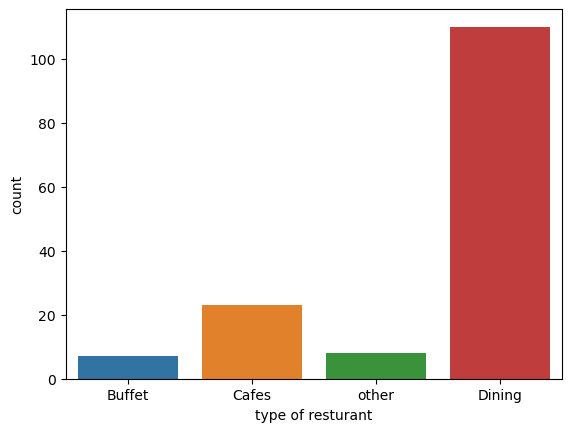

In [10]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")   

conclusion : Majority Of the Resturant falls In dinning category

Q2: How Many  Votes has each type of resturant recived from the customers? 

In [12]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


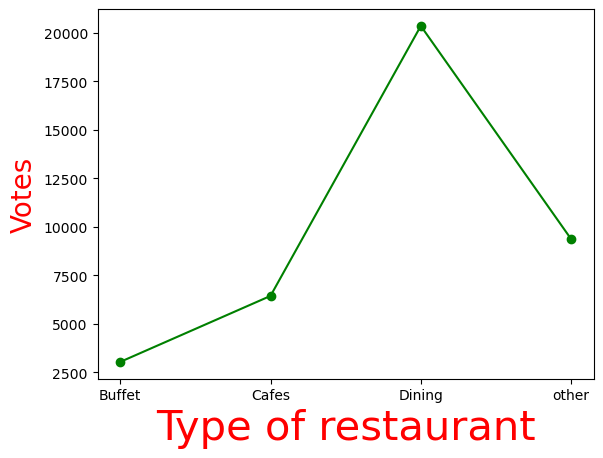

In [17]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()

# Correct the DataFrame creation syntax
result = pd.DataFrame({'votes': grouped_data})

# Plotting the result
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=30)
plt.ylabel("Votes", c="red", size=20)
plt.show()


First case (dataframe.groupby('listed_in(type)')['votes'].sum()):

Groups by the type of restaurant.
Aggregates (sums) the votes for each restaurant type.
This is a meaningful operation and provides the total number of votes for each type of restaurant.

conclusion - Dinning Resturant has recived maximum Votes

Q3: What Are The Ratings That Majority Of The Resturant Recived ?
    

In [18]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


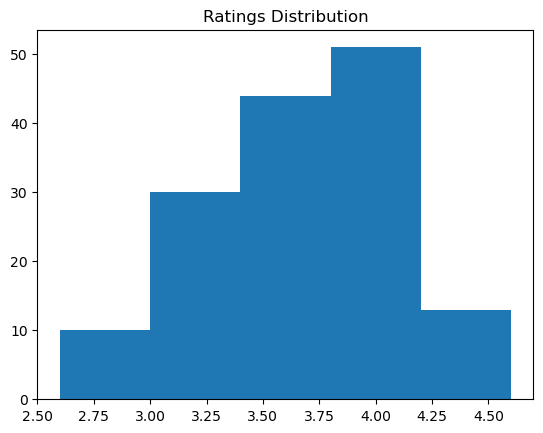

In [22]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

Conclusion - The Majority Resturants Recived Ratings From 3.5 to 4

Q4 : Zomato Has Observed That Most couples Order most of their food online . what is their average spending on each Other

In [24]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

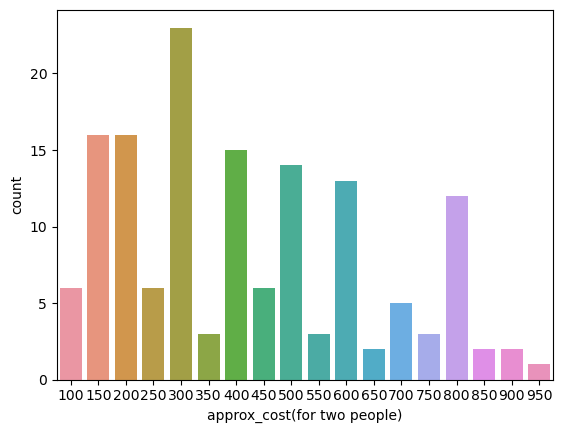

In [25]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion : The Majority Of Couples prefer resturant with an approximate cost of 300 Rupees

Q5: Which Mode (online or Offline) has received the maximum rating

In [27]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

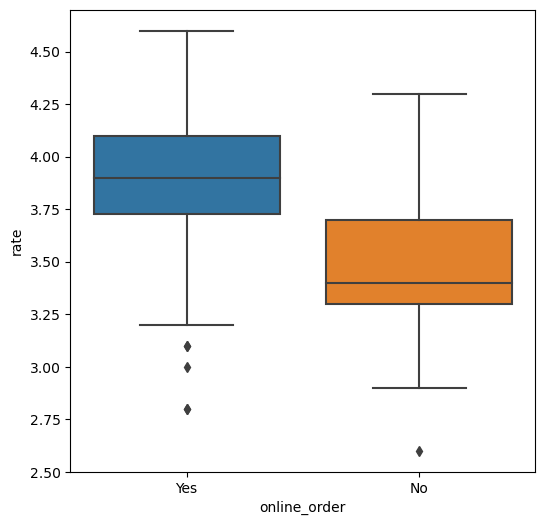

In [31]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y = 'rate' ,data =dataframe)

Conclusion : Offline Order received lower rating in comparison to online order 

Q6 : Which Type Of Resturant recived more offline orders , so that Zomato Can provide customers with some Good Offer 

In [32]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


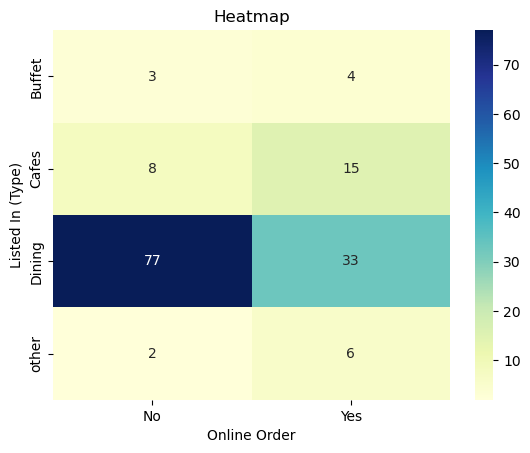

In [34]:
# Create a pivot table with 'listed_in(type)' as index and 'online_order' as columns
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Conclusion : Dining resturants primarily Accept offline orders whereas cafe primarily recive online orders . This Suggest that clients prefer orders in person at resturants , but prefer online ordering at cafes.